In [4]:
!pip3 install -r ./requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import requests, os
from dotenv import dotenv_values
from dataclasses import dataclass
from IPython.display import Image, display

In [2]:
@dataclass
class Point:
    lon: float
    lat: float

In [4]:
API_KEY = dotenv_values('.env')['API_KEY']
API_ENDPOINT = 'https://graph.mapillary.com/images'

In [5]:
DOWNLOAD_FOLDER='images'
os.makedirs(DOWNLOAD_FOLDER, exist_ok=True)

In [6]:
def query_region(bottom_left, top_right, max_images):
    params = {
        'access_token': API_KEY,
        'bbox': f'{bottom_left.lon},{bottom_left.lat},'+
                f'{top_right.lon},{top_right.lat}',
        'fields': 'id,computed_geometry,thumb_256_url,ca',
        'limit': 20 # max images per request
    }
    
    response = requests.get(API_ENDPOINT, params=params)
    response.raise_for_status()
    data = response.json()
    
    output_paths = []
    
    for i, image in enumerate(data.get('data',[])):
        if i >= max_images:
            break
        
        image_id = image['id']
        lat = image["computed_geometry"]["coordinates"][1]
        lon = image["computed_geometry"]["coordinates"][0]
        heading = image.get("ca", "N/A")
        thumb_url = image["thumb_256_url"]

        # Save thumbnail
        img_data = requests.get(thumb_url).content
        image_output_path = os.path.join(DOWNLOAD_FOLDER, f"{image_id}.jpg")
        with open(image_output_path, "wb") as f:
            f.write(img_data)
        output_paths.append(image_output_path)
    
    return output_paths

Try to download 1 image only:

In [7]:
MINPOINT = Point(-122.276527, 37.803705) # bottom left
MAXPOINT = Point(-122.273598, 37.806504) # top right

downloaded = query_region(MINPOINT, MAXPOINT, 1)
print(downloaded)

['images/3705203162940296.jpg']


Display what we downloaded:

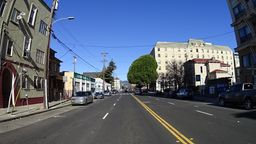

In [8]:
display(Image(filename=downloaded[0]))